<font size=15>Ece Alptekin</font>

<font size=5>Step 1:</font>

To understand the data, pick any two genes and plot their expression values as a single graph.
Use a line graph to see the trend across the time. The x-axis should be the time points, the y-axis is the log2 gene expression values. 
Please properly label your graph.
Explain with one sentence what happens to the expression over time for these genes.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_table('yeastExpression.txt', delim_whitespace=True, index_col=False)
df

,ID,t=0,t=9,t=11,t=13,t=15,t=17,t=19
0,YHR007C,0.224,0.367,0.312,0.014,-0.003,-1.357,-0.811
1,YAL051W,0.002,0.634,0.310,0.441,0.458,-0.136,0.275
2,YAL054C,-1.070,-0.514,-0.220,-0.012,-0.215,1.741,4.239
3,YAL056W,0.090,0.884,0.165,0.199,0.034,0.148,0.935
4,YAL001C,-0.372,1.168,-0.213,0.206,-0.173,-0.013,0.285
...,...,...,...,...,...,...,...,...
6160,NORF88,0.167,0.029,0.085,0.145,0.498,0.333,0.921
6161,NORF90,0.021,-0.028,-0.133,-0.139,0.176,-0.122,0.170
6162,NORF92,-0.197,-0.275,-0.467,-0.338,-0.237,0.074,0.733
6163,NORF94,-0.379,-0.124,-0.303,-0.154,-0.209,-0.399,0.606


In [4]:
new_df = df.head(2)
new_df

,ID,t=0,t=9,t=11,t=13,t=15,t=17,t=19
0,YHR007C,0.224,0.367,0.312,0.014,-0.003,-1.357,-0.811
1,YAL051W,0.002,0.634,0.310,0.441,0.458,-0.136,0.275


In [5]:
new_df = new_df.drop(columns='ID')
new_df

,t=0,t=9,t=11,t=13,t=15,t=17,t=19
0,0.224,0.367,0.312,0.014,-0.003,-1.357,-0.811
1,0.002,0.634,0.310,0.441,0.458,-0.136,0.275


In [6]:
new_df = new_df.T
new_df

,0,1
t=0,0.224,0.002
t=9,0.367,0.634
t=11,0.312,0.310
t=13,0.014,0.441
t=15,-0.003,0.458
t=17,-1.357,-0.136
t=19,-0.811,0.275


Text(0, 0.5, 'log2 Gene Expressions')

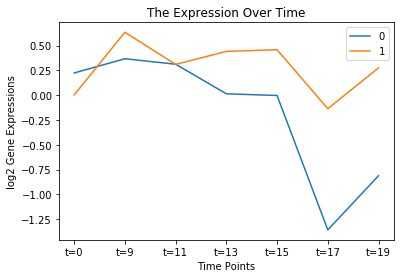

In [7]:
ax = new_df.plot(title='The Expression Over Time')
ax.set_xlabel("Time Points")
ax.set_ylabel("log2 Gene Expressions")

Explain with one sentence what happens to the expression over time for these genes.
For the gene YHR007C, log2 gene expression values decrease until t=17, then it starts to increase. On the other hand, for the gene YAL051W, generally there are no big differences in log2 gene expressions between the time points.

<font size=5>Step 2:</font>

Calculate the Spearman correlation between the expression of the genes you chose. Is there any correlation? If there is is it positive or negative?

In [8]:
from scipy.stats import spearmanr

In [9]:
corr, p_value = spearmanr(new_df[0], new_df[1])

In [10]:
print(corr)

0.5714285714285715


In [11]:
print(p_value)

0.1802019889115274


<font size=5>Step 3:</font>

If a gene’s expression is not varying during the measured time points, it would be hard to identify its role in the process. 
Therefore, we will filter the genes whose expression do not change over time. Calculate the variance of expression for each gene. (In Python num.var function). Rank the genes based on their variance in descending order (the highest variable gene should be at the top). Which gene varies the most? Which gene varies the least?

In [12]:
df

,ID,t=0,t=9,t=11,t=13,t=15,t=17,t=19
0,YHR007C,0.224,0.367,0.312,0.014,-0.003,-1.357,-0.811
1,YAL051W,0.002,0.634,0.310,0.441,0.458,-0.136,0.275
2,YAL054C,-1.070,-0.514,-0.220,-0.012,-0.215,1.741,4.239
3,YAL056W,0.090,0.884,0.165,0.199,0.034,0.148,0.935
4,YAL001C,-0.372,1.168,-0.213,0.206,-0.173,-0.013,0.285
...,...,...,...,...,...,...,...,...
6160,NORF88,0.167,0.029,0.085,0.145,0.498,0.333,0.921
6161,NORF90,0.021,-0.028,-0.133,-0.139,0.176,-0.122,0.170
6162,NORF92,-0.197,-0.275,-0.467,-0.338,-0.237,0.074,0.733
6163,NORF94,-0.379,-0.124,-0.303,-0.154,-0.209,-0.399,0.606


In [13]:
var = df.var(axis=1)

In [14]:
var

0       0.426156
1       0.072351
2       3.379378
3       0.148777
4       0.264848
          ...   
6160    0.097741
6161    0.018760
6162    0.162382
6163    0.118742
6164    0.141498
Length: 6165, dtype: float64

In [15]:
sortedval = var.sort_values(ascending=False)
sortedval

3839    11.534279
801      6.191016
531      4.736351
605      4.350111
562      3.921612
          ...    
806      0.003514
391      0.003382
2775     0.002873
554      0.002704
1405     0.000810
Length: 6165, dtype: float64

In [16]:
df.iloc[3839]

ID      YJL009W
t=0       0.078
t=9      -0.123
t=11      0.062
t=13     -0.161
t=15      0.113
t=17      0.205
t=19      -8.95
Name: 3839, dtype: object

YJL009W gene varies the most.

In [17]:
df.iloc[1405]

ID      YPL016W
t=0      -0.238
t=9      -0.166
t=11     -0.237
t=13      -0.22
t=15     -0.239
t=17     -0.236
t=19     -0.193
Name: 1405, dtype: object

YPL016W gene varies the least.

<font size=5>Step 4:</font>

In a typical analysis genes with low variance are removed. 
Here we will filter even more to obtain a manageable list.
For this, select the top 800 most varying genes. Report the lowest variance in this 800 gene list.

In [18]:
var

0       0.426156
1       0.072351
2       3.379378
3       0.148777
4       0.264848
          ...   
6160    0.097741
6161    0.018760
6162    0.162382
6163    0.118742
6164    0.141498
Length: 6165, dtype: float64

In [19]:
newdata = sortedval[:800]
newdata

3839    11.534279
801      6.191016
531      4.736351
605      4.350111
562      3.921612
          ...    
2947     0.535934
3111     0.535759
3983     0.535750
5737     0.535557
1756     0.535379
Length: 800, dtype: float64

In [20]:
newdata.iloc[799]

0.5353791428571428

The lowest variance in this 800 gene list is 0.5353791428571428.

<font size=5>Step 5:</font>

Cluster the genes in the filtered dataset using hierarchical clustering with average linkage function and with a distance function of your choice. Display your clustering results with a heatmap. You may do this by using Python or you may use this tool http://www2.heatmapper.ca/expression/. The accepted file formats are specified in the link http://www2.heatmapper.ca/about/instructions/: Are the genes clustered well ? Do you observe any interesting result? State with one sentence.

In [21]:
type(newdata)

pandas.core.series.Series

In [22]:
clusterdata = newdata.to_frame()
clusterdata

,0
3839,11.534279
801,6.191016
531,4.736351
605,4.350111
562,3.921612
...,...
2947,0.535934
3111,0.535759
3983,0.535750
5737,0.535557


In [23]:
col = df['ID']
newcol = col.to_frame()
newcol

,ID
0,YHR007C
1,YAL051W
2,YAL054C
3,YAL056W
4,YAL001C
...,...
6160,NORF88
6161,NORF90
6162,NORF92
6163,NORF94


In [24]:
filtered = clusterdata.merge(df, left_index=True, right_index=True)
filtered = filtered.drop(columns=0)
filtered

,ID,t=0,t=9,t=11,t=13,t=15,t=17,t=19
3839,YJL009W,0.078,-0.123,0.062,-0.161,0.113,0.205,-8.950
801,YJL216C,-0.545,-1.573,-0.098,-0.268,-6.310,1.234,0.441
531,YGL184C,-1.322,-3.467,-0.051,-0.588,-4.222,1.594,1.012
605,YGR225W,-1.061,-4.479,0.735,0.220,-0.285,2.120,0.627
562,YGR043C,-0.400,-1.345,-0.282,-0.071,0.379,3.962,3.122
...,...,...,...,...,...,...,...,...
2947,YOR369C,0.164,0.343,0.162,0.345,0.163,-0.582,-1.649
3111,YAL036C,0.187,0.128,0.326,-0.482,-0.353,-1.178,-1.606
3983,YKL198C,-0.673,-0.495,-0.223,-0.291,-1.760,0.665,-0.077
5737,YMR136W,-0.384,0.232,0.750,0.357,0.906,1.469,1.734


In [25]:
filtered.to_csv(r'data.csv', index=None, sep=',')

These genes are clustered well, since according to the heat map, genes are located close to each other. They are not spread over a wide area.